In [1]:
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df_original = pd.read_csv('Accident_Information.csv')

C:\Users\SALONI JHA\AppData\Local\Temp\ipykernel_21188\674846486.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('Accident_Information.csv')


In [3]:
df_original.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


In [4]:
df_org = df_original[['1st_Road_Class','Carriageway_Hazards','Day_of_Week',
                      'Junction_Detail','Light_Conditions','Road_Surface_Conditions','Road_Type',
                      'Special_Conditions_at_Site','Speed_limit','Time','Urban_or_Rural_Area','Weather_Conditions',
                      'Accident_Severity']]

In [5]:
df_org.head()

,1st_Road_Class,Carriageway_Hazards,Day_of_Week,Junction_Detail,Light_Conditions,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Accident_Severity
0,A,None,Tuesday,Not at junction or within 20 metres,Daylight,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,Serious
1,B,None,Wednesday,Crossroads,Darkness - lights lit,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,Slight
2,C,None,Thursday,Not at junction or within 20 metres,Darkness - lights lit,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,Slight
3,A,None,Friday,Not at junction or within 20 metres,Daylight,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,Slight
4,Unclassified,None,Monday,Not at junction or within 20 metres,Darkness - lighting unknown,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,Slight


In [6]:
df_org_y = df_org[['Accident_Severity']]

In [7]:
df_org_y.head()


,Accident_Severity
0,Serious
1,Slight
2,Slight
3,Slight
4,Slight


In [8]:
df_org_x = df_org[['1st_Road_Class','Carriageway_Hazards','Day_of_Week','Junction_Detail',
                   'Light_Conditions','Road_Surface_Conditions','Road_Type','Special_Conditions_at_Site',
                   'Speed_limit','Time','Urban_or_Rural_Area','Weather_Conditions']]

In [9]:
df_org_y['Accident_Severity'].value_counts()

Slight     1734548
Serious     286339
Fatal        26369
Name: Accident_Severity, dtype: int64

In [10]:
df_org_y['Accident_Severity'].value_counts()


Slight     1734548
Serious     286339
Fatal        26369
Name: Accident_Severity, dtype: int64

In [11]:
df_org_y[['Accident_Severity']].value_counts()

Accident_Severity
Slight               1734548
Serious               286339
Fatal                  26369
dtype: int64

In [12]:
df_org_y.head()

,Accident_Severity
0,Serious
1,Slight
2,Slight
3,Slight
4,Slight


In [13]:
df=df_original
df.dtypes

Accident_Index                                  object
1st_Road_Class                                  object
1st_Road_Number                                float64
2nd_Road_Class                                  object
2nd_Road_Number                                float64
Accident_Severity                               object
Carriageway_Hazards                             object
Date                                            object
Day_of_Week                                     object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                                object
Junction_Detail                                 object
Latitude                                       float64
Light_Conditions                                object
Local_Authority_(District)                      object
Local_Authority_(Highway)                       object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude 

In [14]:
df_original.dropna(axis=1,how='all',inplace=True)

In [15]:
df_original

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047251,2017984121017,A(M),74.0,NaN,0.0,Slight,None,2017-12-17,Sunday,1.0,...,Dumfries and Galloway,Frost or ice,Dual carriageway,None,70.0,11:30,Rural,Other,2017,Yes
2047252,2017984121217,C,69.0,NaN,0.0,Slight,Pedestrian in carriageway - not injured,2017-12-15,Friday,2.0,...,Dumfries and Galloway,Dry,Single carriageway,None,20.0,13:00,Urban,Fine no high winds,2017,Yes
2047253,2017984121717,A(M),74.0,Unclassified,0.0,Slight,None,2017-12-18,Monday,1.0,...,Dumfries and Galloway,Wet or damp,Dual carriageway,None,70.0,13:30,Rural,Fine no high winds,2017,Yes
2047254,2017984122317,A,708.0,NaN,0.0,Slight,None,2017-07-18,Tuesday,1.0,...,Dumfries and Galloway,Dry,Single carriageway,None,60.0,18:00,Rural,Fine no high winds,2017,Yes


In [16]:
def to_hour(time):
    try:
        hour = datetime.strptime(str(time), '%H:%M')
        return int(datetime.strftime(hour, '%H'))
    except Exception:
        return 0

In [17]:
df_original.replace('', np.nan, inplace=True)

In [18]:
df_original.replace('Unknown', np.nan, inplace=True)

In [48]:
df_original.dropna(axis=0, inplace=True)

In [47]:
df_original['Junction_Control'].replace(np.nan, 'None', inplace=True)

In [46]:
df_original['Date'] = pd.to_datetime(df_original['Date'], format='%Y-%m-%d')
df_original['Month'] = df_original['Date'].dt.month
df_original['Day'] = df_original['Date'].dt.day
df_original['Hour of Day'] = df_original['Time'].apply(to_hour)

In [45]:
df_original.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,Month,Day,Hour of Day
1,200501BS00002,2,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,None,30.0,17:36,Urban,Fine no high winds,2005,No,1,5,0
6,200501BS00007,3,0.0,Unclassified,0.0,Slight,None,2005-01-13,Thursday,1.0,...,None,30.0,20:40,Urban,Fine no high winds,2005,No,1,13,0
8,200501BS00010,1,3212.0,B,304.0,Slight,None,2005-01-15,Saturday,1.0,...,None,30.0,22:43,Urban,Fine no high winds,2005,No,1,15,0
9,200501BS00011,2,450.0,C,0.0,Slight,None,2005-01-15,Saturday,1.0,...,None,30.0,16:00,Urban,Fine no high winds,2005,No,1,15,0
10,200501BS00012,1,4.0,B,325.0,Slight,None,2005-01-16,Sunday,1.0,...,None,30.0,00:42,Urban,Fine no high winds,2005,No,1,16,0


In [49]:
print(df_original['Carriageway_Hazards'].value_counts())

None                                               1091447
Other object on road                                  4929
Pedestrian in carriageway - not injured               2282
Any animal in carriageway (except ridden horse)       1652
Vehicle load on road                                   899
Previous accident                                      676
Name: Carriageway_Hazards, dtype: int64


In [50]:
df_original.drop(df_original.loc[df_original['Carriageway_Hazards']=='Data missing or out of range'].index, inplace=True)

In [51]:
df_original.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,Month,Day,Hour of Day
1,200501BS00002,2,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,None,30.0,17:36,Urban,Fine no high winds,2005,No,1,5,0
6,200501BS00007,3,0.0,Unclassified,0.0,Slight,None,2005-01-13,Thursday,1.0,...,None,30.0,20:40,Urban,Fine no high winds,2005,No,1,13,0
8,200501BS00010,1,3212.0,B,304.0,Slight,None,2005-01-15,Saturday,1.0,...,None,30.0,22:43,Urban,Fine no high winds,2005,No,1,15,0
9,200501BS00011,2,450.0,C,0.0,Slight,None,2005-01-15,Saturday,1.0,...,None,30.0,16:00,Urban,Fine no high winds,2005,No,1,15,0
10,200501BS00012,1,4.0,B,325.0,Slight,None,2005-01-16,Sunday,1.0,...,None,30.0,00:42,Urban,Fine no high winds,2005,No,1,16,0


In [52]:
print(df_original['Carriageway_Hazards'].value_counts())

None                                               1091447
Other object on road                                  4929
Pedestrian in carriageway - not injured               2282
Any animal in carriageway (except ridden horse)       1652
Vehicle load on road                                   899
Previous accident                                      676
Name: Carriageway_Hazards, dtype: int64


In [53]:
print(df_original['Light_Conditions'].value_counts())

Daylight                       816794
Darkness - lights lit          248009
Darkness - no lighting          21798
Darkness - lighting unknown     10474
Darkness - lights unlit          4810
Name: Light_Conditions, dtype: int64


In [54]:
df_original.drop(df_original.loc[df_original['Light_Conditions']=='Data missing or out of range'].index, inplace=True)

In [55]:
print(df_original['Day_of_Week'].value_counts())

Friday       181331
Wednesday    169887
Thursday     168700
Tuesday      168693
Monday       157457
Saturday     142410
Sunday       113407
Name: Day_of_Week, dtype: int64


In [56]:
print(df_original['Special_Conditions_at_Site'].value_counts())

None                                          1080929
Roadworks                                       10166
Oil or diesel                                    2642
Auto traffic signal - out                        2585
Road sign or marking defective or obscured       2193
Road surface defective                           1532
Mud                                              1141
Auto signal part defective                        697
Name: Special_Conditions_at_Site, dtype: int64


In [57]:
df_original.drop(df_original.loc[df_original['Special_Conditions_at_Site']=='Data missing or out of range'].index, inplace=True)

In [58]:
df_original['1st_Road_Class'].value_counts()

1    852623
2    140524
3     97393
4     11345
Name: 1st_Road_Class, dtype: int64

In [59]:
encoding_1st_road_class = {"1st_Road_Class": {"A": 1, "A(M)": 1, "B": 2, "C": 3, "Motorway": 4, "Unclassified": 1}}
df_original.replace(encoding_1st_road_class, inplace=True)
df_original['1st_Road_Class'].value_counts()

1    852623
2    140524
3     97393
4     11345
Name: 1st_Road_Class, dtype: int64

In [60]:
df_original['Junction_Detail'].value_counts()

T or staggered junction                586128
Crossroads                             180661
Roundabout                             162093
Private drive or entrance               56091
Other junction                          46201
Slip road                               26788
More than 4 arms (not roundabout)       22659
Mini-roundabout                         20941
Not at junction or within 20 metres       323
Name: Junction_Detail, dtype: int64

In [61]:
df_original.drop(df_original.loc[df_original['Junction_Detail']=='Data missing or out of range'].index, inplace=True)

In [62]:
df_original['Road_Surface_Conditions'].value_counts()


Dry                     796180
Wet or damp             287683
Frost or ice             13219
Snow                      4273
Flood over 3cm. deep       530
Name: Road_Surface_Conditions, dtype: int64

In [63]:
df_original.drop(df_original.loc[df_original['Road_Surface_Conditions']=='Data missing or out of range'].index, inplace=True)

In [64]:
df_original['Road_Type'].value_counts()

Single carriageway    821689
Roundabout            124558
Dual carriageway      117162
One way street         24536
Slip road              13940
Name: Road_Type, dtype: int64

In [65]:
df_original.drop(df_original.loc[df_original['Road_Type']=='Unknown'].index, inplace=True)

In [66]:
df_original['Urban_or_Rural_Area'].value_counts()

Urban    835600
Rural    266285
Name: Urban_or_Rural_Area, dtype: int64

In [67]:
df_original.drop(df_original.loc[df_original['Urban_or_Rural_Area']=='Unallocated'].index, inplace=True)

In [68]:
df_original['Weather_Conditions'].value_counts()

Fine no high winds       917524
Raining no high winds    126244
Other                     22071
Fine + high winds         12523
Raining + high winds      12516
Snowing no high winds      5451
Fog or mist                4842
Snowing + high winds        714
Name: Weather_Conditions, dtype: int64

In [69]:
df_original.drop(df_original.loc[df_original['Weather_Conditions']=='Data missing or out of range'].index, inplace=True)

In [70]:
df_original.drop(df_original.loc[df_original['Weather_Conditions']=='Unknown'].index, inplace=True

SyntaxError: incomplete input (1238827938.py, line 1)

In [71]:
df_original.drop(df_original.loc[df_original['Weather_Conditions']=='Unknown'].index, inplace=True

SyntaxError: incomplete input (1238827938.py, line 1)

In [72]:
df_original.drop(df_original.loc[df_original['Weather_Conditions']=='Unknown'].index, inplace=True)

In [73]:
df_original['Speed_limit'].value_counts()

30.0    818639
60.0    101047
40.0     96737
70.0     33302
50.0     30562
20.0     21596
10.0         1
0.0          1
Name: Speed_limit, dtype: int64

In [74]:
np.where(np.isnan(df_original['Speed_limit']))

(array([], dtype=int64),)

In [75]:
df_original['Time'].fillna(0, inplace=True)

In [76]:
df_original.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,Month,Day,Hour of Day
1,200501BS00002,2,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,None,30.0,17:36,Urban,Fine no high winds,2005,No,1,5,0
6,200501BS00007,3,0.0,Unclassified,0.0,Slight,None,2005-01-13,Thursday,1.0,...,None,30.0,20:40,Urban,Fine no high winds,2005,No,1,13,0
8,200501BS00010,1,3212.0,B,304.0,Slight,None,2005-01-15,Saturday,1.0,...,None,30.0,22:43,Urban,Fine no high winds,2005,No,1,15,0
9,200501BS00011,2,450.0,C,0.0,Slight,None,2005-01-15,Saturday,1.0,...,None,30.0,16:00,Urban,Fine no high winds,2005,No,1,15,0
10,200501BS00012,1,4.0,B,325.0,Slight,None,2005-01-16,Sunday,1.0,...,None,30.0,00:42,Urban,Fine no high winds,2005,No,1,16,0


In [77]:
df_org = df_original[['Accident_Index',
                      '1st_Road_Class',
                      'Carriageway_Hazards',
                      'Day_of_Week','Junction_Detail','Light_Conditions','Road_Surface_Conditions',
                      'Road_Type','Special_Conditions_at_Site','Speed_limit',
                      'Date','Time','Urban_or_Rural_Area','Weather_Conditions','Accident_Severity']]

In [78]:
df_org.dropna(axis=1,how='all',inplace=True)

C:\Users\SALONI JHA\AppData\Local\Temp\ipykernel_21188\643893032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org.dropna(axis=1,how='all',inplace=True)


In [79]:
df_org.replace('', np.nan, inplace=True)

C:\Users\SALONI JHA\AppData\Local\Temp\ipykernel_21188\3834057228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org.replace('', np.nan, inplace=True)


In [80]:
df_org.replace('Unknown', np.nan, inplace=True)

C:\Users\SALONI JHA\AppData\Local\Temp\ipykernel_21188\4241267223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org.replace('Unknown', np.nan, inplace=True)


In [81]:
df_org.dropna(axis=0, inplace=True)

C:\Users\SALONI JHA\AppData\Local\Temp\ipykernel_21188\114732408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org.dropna(axis=0, inplace=True)


In [82]:
encoding = {
"Carriageway_Hazards": {"None": 0, "Other object on road": 1, "Any animal in carriageway (except ridden horse)": 1,  "Pedestrian in carriageway - not injured": 1, 
                        "Previous accident": 1, "Vehicle load on road": 1 }
}
df_org.replace(encoding, inplace=True)
print(df_org['Carriageway_Hazards'].value_counts())

0    1091447
1      10438
Name: Carriageway_Hazards, dtype: int64


C:\Users\SALONI JHA\AppData\Local\Temp\ipykernel_21188\4171612260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org.replace(encoding, inplace=True)


In [83]:
encoding_light = {"Light_Conditions": {"Daylight": 0, "Darkness - lights lit": 1, "Darkness - no lighting": 1, "Darkness - lighting unknown": 1, "Darkness - lights unlit": 1}}
df_org.replace(encoding_light, inplace=True)
print(df_org['Light_Conditions'].value_counts())

0    816794
1    285091
Name: Light_Conditions, dtype: int64


C:\Users\SALONI JHA\AppData\Local\Temp\ipykernel_21188\1173470185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org.replace(encoding_light, inplace=True)


In [84]:
encoding_Special_Conditions_at_Site = {"Special_Conditions_at_Site": {"None": 0, "Roadworks": 1, "Oil or diesel": 1, "Mud": 1, "Road surface defective": 1, "Auto traffic signal - out": 1, "Road sign or marking defective or obscured": 1, "Auto signal part defective": 1}}
df_org.replace(encoding_Special_Conditions_at_Site, inplace=True)
print(df_org['Special_Conditions_at_Site'].value_counts())

0    1080929
1      20956
Name: Special_Conditions_at_Site, dtype: int64


C:\Users\SALONI JHA\AppData\Local\Temp\ipykernel_21188\1021815437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org.replace(encoding_Special_Conditions_at_Site, inplace=True)


In [85]:
encoding_junction_detail = {"Junction_Detail": 
                            {"Not at junction or within 20 metres": 1,
                             "T or staggered junction": 2,
                             "Crossroads": 3, 
                             "Roundabout": 4,
                             "Private drive or entrance": 5,
                             "Other junction": 6,
                             "Slip road": 7,
                             "More than 4 arms (not roundabout)": 8,
                             "Mini-roundabout": 9 }}
df_org.replace(encoding_junction_detail, inplace=True)
df_org['Junction_Detail'].value_counts()

C:\Users\SALONI JHA\AppData\Local\Temp\ipykernel_21188\3421071632.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org.replace(encoding_junction_detail, inplace=True)


2    586128
3    180661
4    162093
5     56091
6     46201
7     26788
8     22659
9     20941
1       323
Name: Junction_Detail, dtype: int64

In [86]:
encoding_road_surface_cond = {"Road_Surface_Conditions": 
                            {"Dry": 1,
                             "Wet or damp": 2,
                             "Frost or ice": 3, 
                             "Snow": 4,
                             "Flood over 3cm. deep": 5}}
df_org.replace(encoding_road_surface_cond, inplace=True)
df_org['Road_Surface_Conditions'].value_counts()

C:\Users\SALONI JHA\AppData\Local\Temp\ipykernel_21188\2298087215.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org.replace(encoding_road_surface_cond, inplace=True)


1    796180
2    287683
3     13219
4      4273
5       530
Name: Road_Surface_Conditions, dtype: int64

In [87]:
encoding_road_type = {"Road_Type": 
                            {"Single carriageway": 1,
                             "Dual carriageway": 2,
                             "Roundabout": 3, 
                             "One way street": 4,
                             "Slip road": 5}}
df_org.replace(encoding_road_type, inplace=True)
df_org['Road_Type'].value_counts()

C:\Users\SALONI JHA\AppData\Local\Temp\ipykernel_21188\974338170.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org.replace(encoding_road_type, inplace=True)


1    821689
3    124558
2    117162
4     24536
5     13940
Name: Road_Type, dtype: int64

In [88]:
encoding_urban_rural = {"Urban_or_Rural_Area": 
                            {"Urban": 1,
                             "Rural": 2 }}
df_org.replace(encoding_urban_rural, inplace=True)
df_org['Urban_or_Rural_Area'].value_counts()

C:\Users\SALONI JHA\AppData\Local\Temp\ipykernel_21188\1448913924.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org.replace(encoding_urban_rural, inplace=True)


1    835600
2    266285
Name: Urban_or_Rural_Area, dtype: int64

In [89]:
encoding_weather = {"Weather_Conditions": 
                            {"Fine no high winds": 1,
                             "Raining no high winds": 2,
                             "Raining + high winds": 3,
                             "Fine + high winds": 4,
                             "Snowing no high winds": 5,
                             "Fog or mist": 6,
                             "Snowing + high winds": 7,
                             "Other": 8 }}
df_org.replace(encoding_weather, inplace=True)
df_org['Weather_Conditions'].value_counts()

C:\Users\SALONI JHA\AppData\Local\Temp\ipykernel_21188\657882954.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org.replace(encoding_weather, inplace=True)


1    917524
2    126244
8     22071
4     12523
3     12516
5      5451
6      4842
7       714
Name: Weather_Conditions, dtype: int64

In [90]:
sns.countplot("Accident_Severity",data=df_org)

TypeError: countplot() got multiple values for argument 'data'

In [91]:
df_org.head()



,Accident_Index,1st_Road_Class,Carriageway_Hazards,Day_of_Week,Junction_Detail,Light_Conditions,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Date,Time,Urban_or_Rural_Area,Weather_Conditions,Accident_Severity
1,200501BS00002,2,0,Wednesday,3,1,1,2,0,30.0,2005-01-05,17:36,1,1,Slight
6,200501BS00007,3,0,Thursday,2,1,1,1,0,30.0,2005-01-13,20:40,1,1,Slight
8,200501BS00010,1,0,Saturday,3,1,1,1,0,30.0,2005-01-15,22:43,1,1,Slight
9,200501BS00011,2,0,Saturday,2,0,1,1,0,30.0,2005-01-15,16:00,1,1,Slight
10,200501BS00012,1,0,Sunday,3,1,1,1,0,30.0,2005-01-16,00:42,1,1,Slight


In [92]:
sns.countplot("Accident_Severity",data=df_org)

TypeError: countplot() got multiple values for argument 'data'

AttributeError: Rectangle.set() got an unexpected keyword argument 'Data'

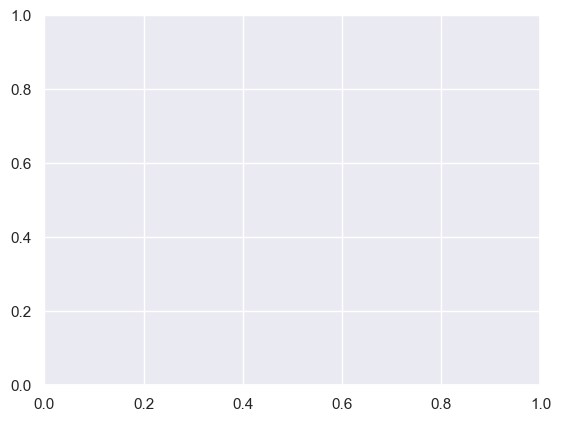

In [93]:
sns.countplot(Data=df_org)
plt.show()

In [94]:
sns.countplot(Data=df_org,
             x="Accident_Severity")
plt.show()

ValueError: Could not interpret input 'Accident_Severity'

In [95]:
sns.set_theme(style="darkgrid")

In [96]:
df_org=sns.load dataset(df_org)

SyntaxError: invalid syntax (3230921961.py, line 1)

In [97]:
df_org=sns.load_dataset(df_org)

TypeError: This function accepts only strings (the name of an example dataset). You passed a pandas DataFrame. If you have your own dataset, it is not necessary to use this function before plotting.

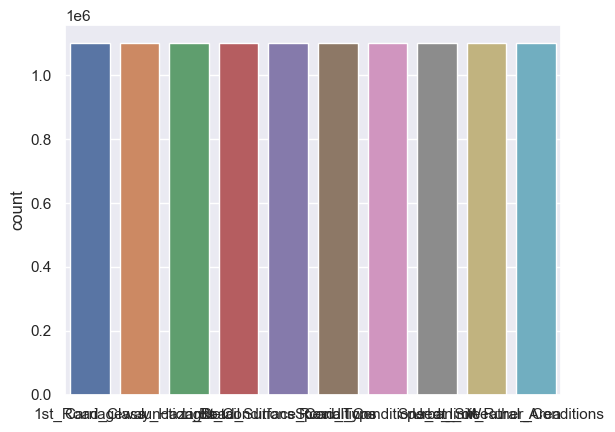

In [98]:
sns.countplot(data=df_org)
plt.show()

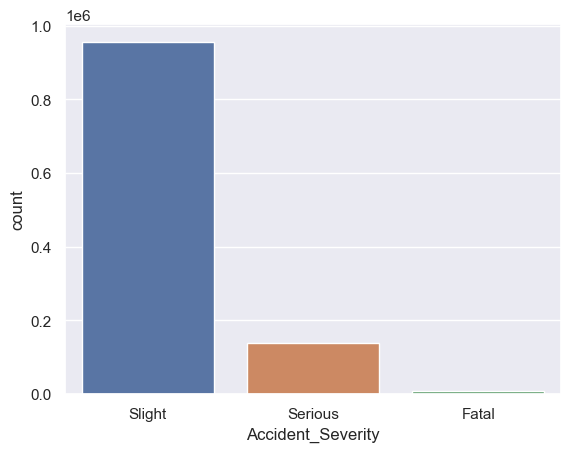

In [99]:
sns.countplot(data=df_org,x="Accident_Severity")
plt.show()

In [ ]:
sns.set()
sns.pairplot(df_org,hue='Accident_Severity',dropna=True)

In [101]:
df_org

,Accident_Index,1st_Road_Class,Carriageway_Hazards,Day_of_Week,Junction_Detail,Light_Conditions,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Date,Time,Urban_or_Rural_Area,Weather_Conditions,Accident_Severity
1,200501BS00002,2,0,Wednesday,3,1,1,2,0,30.0,2005-01-05,17:36,1,1,Slight
6,200501BS00007,3,0,Thursday,2,1,1,1,0,30.0,2005-01-13,20:40,1,1,Slight
8,200501BS00010,1,0,Saturday,3,1,1,1,0,30.0,2005-01-15,22:43,1,1,Slight
9,200501BS00011,2,0,Saturday,2,0,1,1,0,30.0,2005-01-15,16:00,1,1,Slight
10,200501BS00012,1,0,Sunday,3,1,1,1,0,30.0,2005-01-16,00:42,1,1,Slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040128,201763DP06517,1,0,Wednesday,2,0,1,1,0,60.0,2017-03-08,15:20,2,1,Slight
2040130,201763DP06717,1,0,Wednesday,2,0,1,1,0,30.0,2017-03-15,13:45,1,1,Slight
2040138,201763DP07517,2,0,Monday,5,0,2,1,0,60.0,2017-03-20,11:45,2,2,Serious
2040140,201763DP07717,1,0,Friday,2,0,4,1,0,30.0,2017-02-03,06:36,2,1,Slight


In [102]:
df_org.head()

,Accident_Index,1st_Road_Class,Carriageway_Hazards,Day_of_Week,Junction_Detail,Light_Conditions,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Date,Time,Urban_or_Rural_Area,Weather_Conditions,Accident_Severity
1,200501BS00002,2,0,Wednesday,3,1,1,2,0,30.0,2005-01-05,17:36,1,1,Slight
6,200501BS00007,3,0,Thursday,2,1,1,1,0,30.0,2005-01-13,20:40,1,1,Slight
8,200501BS00010,1,0,Saturday,3,1,1,1,0,30.0,2005-01-15,22:43,1,1,Slight
9,200501BS00011,2,0,Saturday,2,0,1,1,0,30.0,2005-01-15,16:00,1,1,Slight
10,200501BS00012,1,0,Sunday,3,1,1,1,0,30.0,2005-01-16,00:42,1,1,Slight


In [103]:
g=sns.pairplot(df_org)

ERROR! Session/line number was not unique in database. History logging moved to new session 20



KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000001F7D180D6C0> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x000001F7D1AE64D0> (for post_execute):



KeyboardInterrupt



In [ ]:
sns.set()
sns.pairplot(df_org,hue='Accident_Severity',dropna=True)

In [ ]:
sns.pairplot(df_head)

In [104]:
g=sns.pairplot(df_org)


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000001F7D180D6C0> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x000001F7D1AE64D0> (for post_execute):



KeyboardInterrupt



In [105]:
sns.pairplot(df_head)

NameError: name 'df_head' is not defined


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000001F7D180D6C0> (for post_execute):


KeyboardInterrupt: 

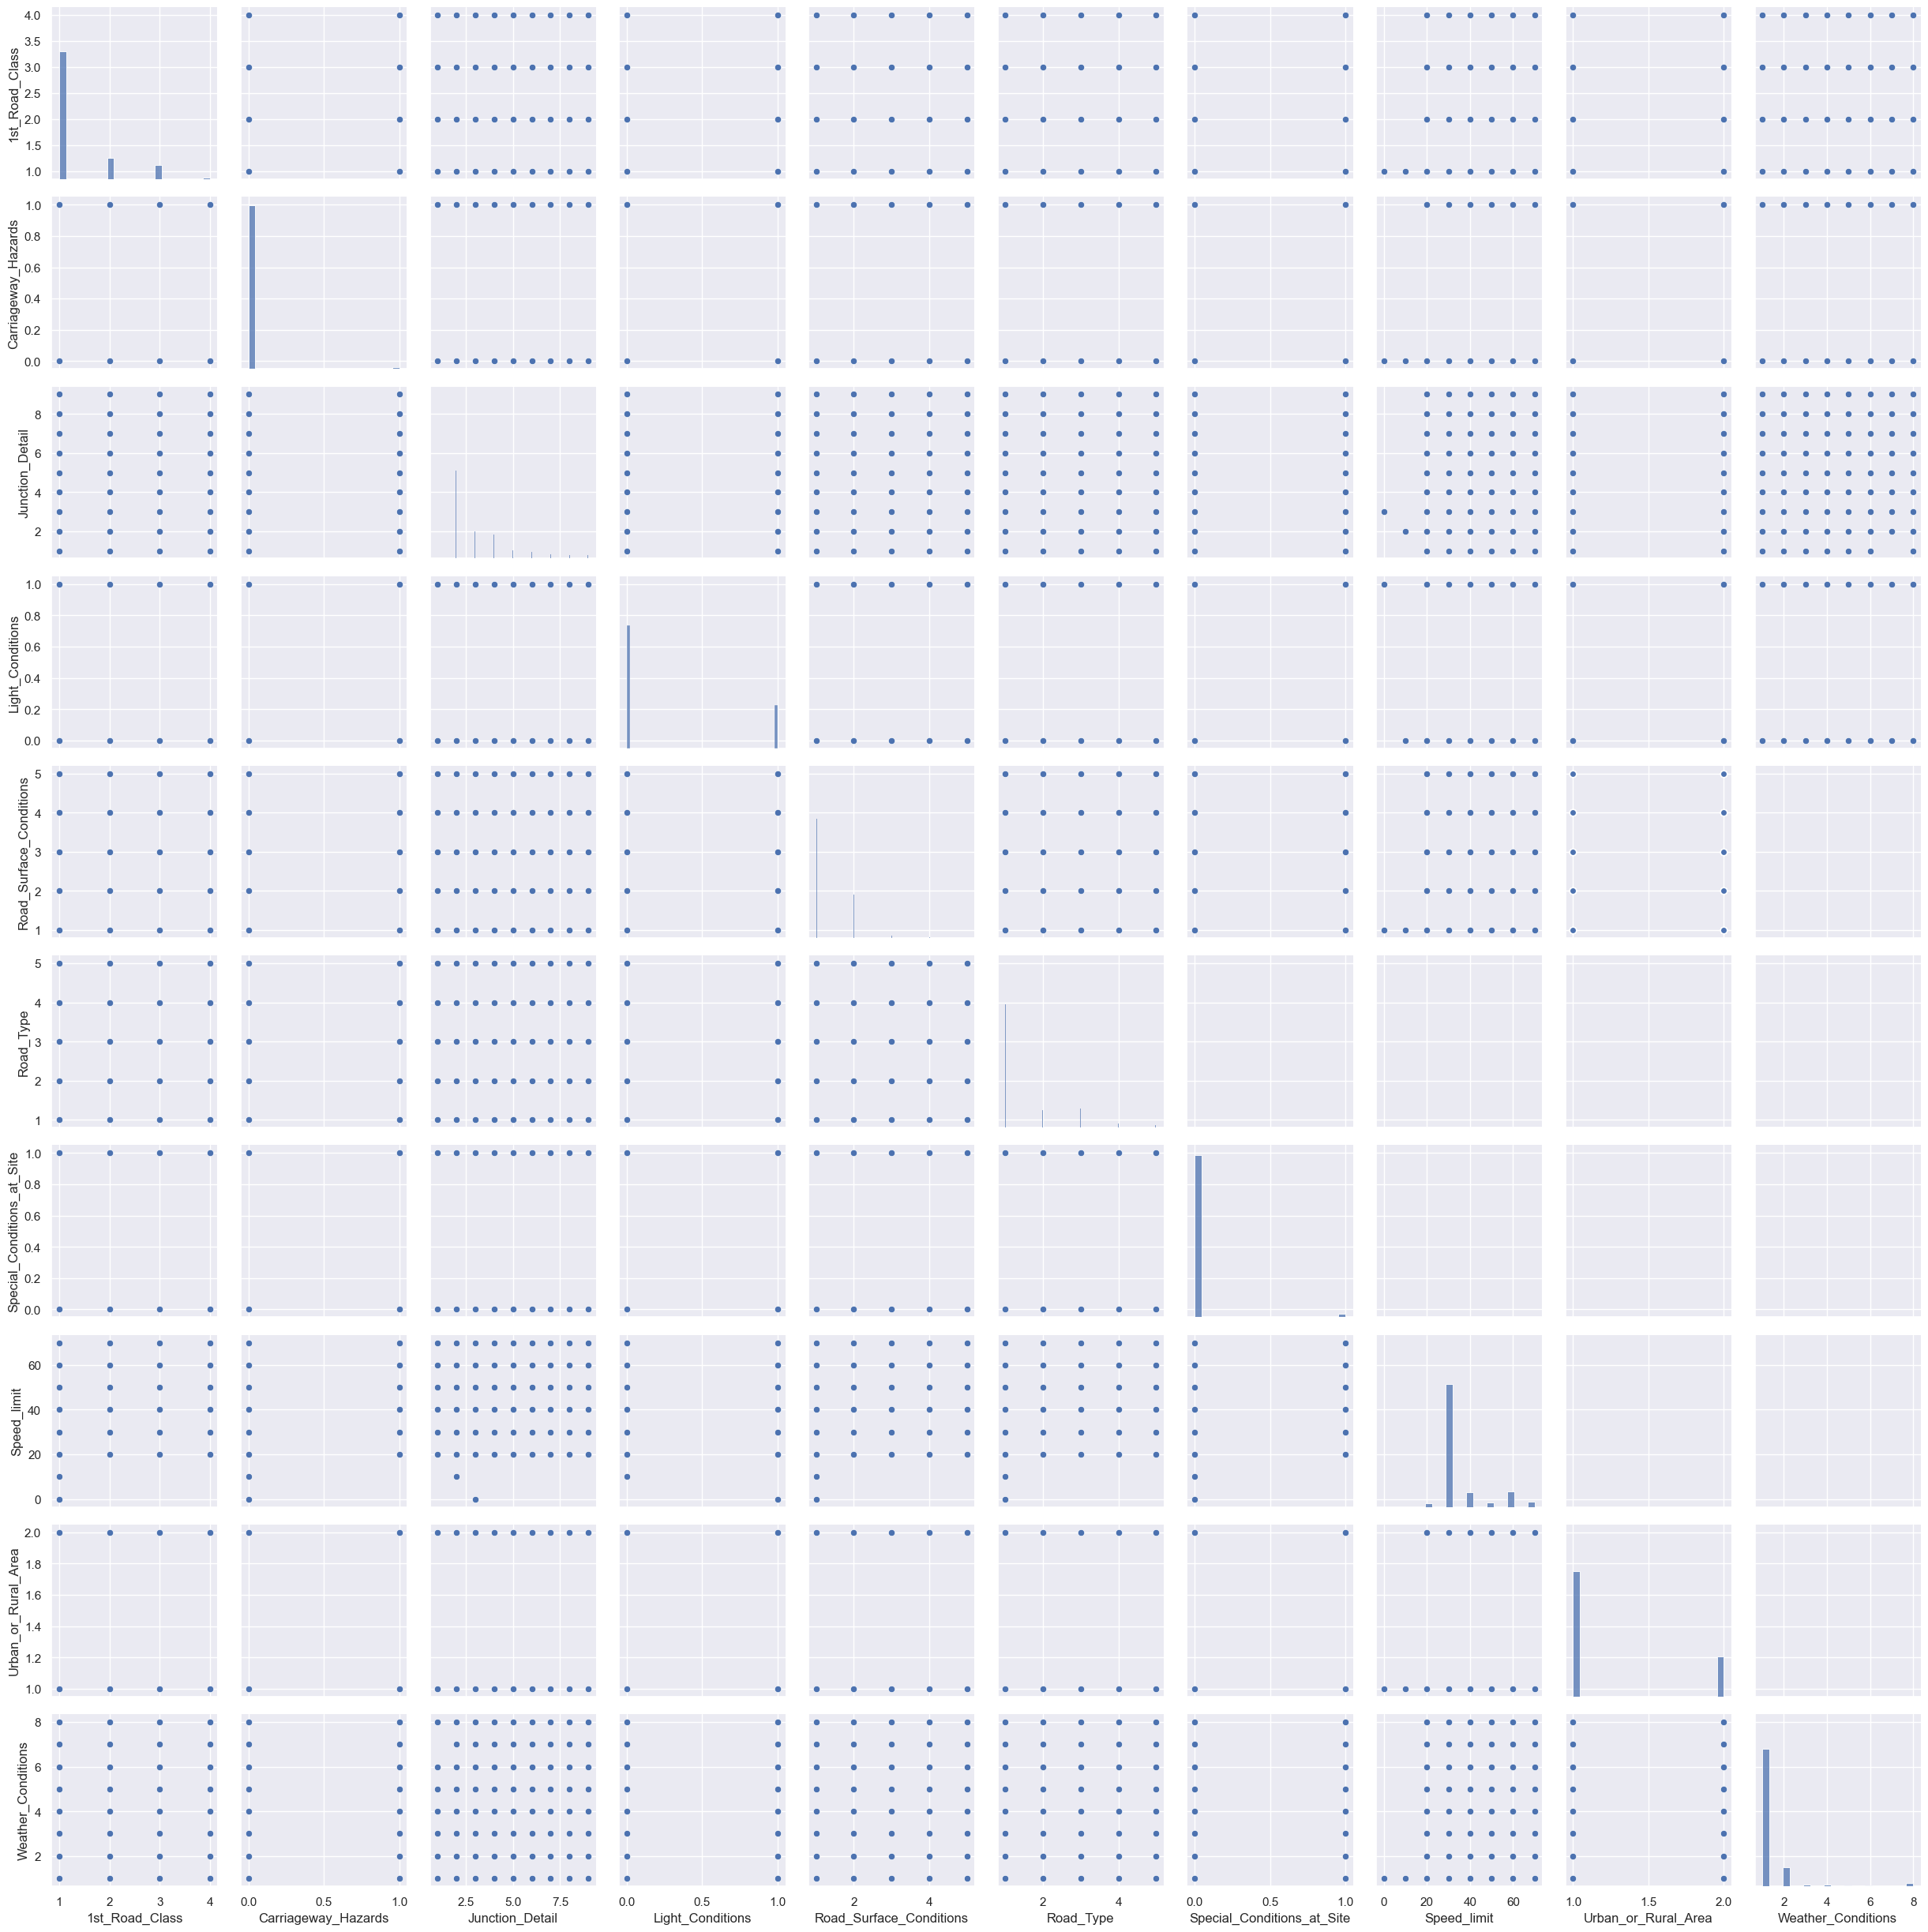

In [106]:
sns.pairplot(df_org)

In [ ]:
g=sns.pairplot(df_org)

In [107]:
accident_severity = {"Accident_Severity": 
                            {"Serious": 1,
                             "Fatal": 1,
                             "Slight": 0}}
df_org.replace(accident_severity, inplace=True)
df_org['Accident_Severity'].value_counts()

C:\Users\SALONI JHA\AppData\Local\Temp\ipykernel_21188\3786950008.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org.replace(accident_severity, inplace=True)


0    956285
1    145600
Name: Accident_Severity, dtype: int64

In [108]:
df_org['Date'] = pd.to_datetime(df_org['Date'], format='%Y-%m-%d')
df_org['Month'] = df_org['Date'].dt.month
df_org['Day'] = df_org['Date'].dt.day
df_org['Hour of Day'] = df_org['Time'].apply(to_hour)

C:\Users\SALONI JHA\AppData\Local\Temp\ipykernel_21188\2182571399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org['Date'] = pd.to_datetime(df_org['Date'], format='%Y-%m-%d')
C:\Users\SALONI JHA\AppData\Local\Temp\ipykernel_21188\2182571399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org['Month'] = df_org['Date'].dt.month
C:\Users\SALONI JHA\AppData\Local\Temp\ipykernel_21188\2182571399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [109]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
plotly.tools.set_config_file(world_readable=True)

AttributeError: module 'plotly.tools' has no attribute 'set_config_file'

In [110]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
plotly.tools.set_config_file(world_readable=True)

AttributeError: module 'plotly.tools' has no attribute 'set_config_file'